In [1]:
import pandas as pd
import numpy as np
#import panel as pn
import os
#pn.extension('tabulator')

#import hvplot.pandas


import matplotlib.pyplot as plt
import math

In [2]:
#filepath = "/Users/Sunny/Desktop/viz_german_lm/results_data_freeze.csv"
filepath = "/Users/Sunny/Desktop/viz_german_lm/results_data.csv"

In [3]:
filepath

'/Users/Sunny/Desktop/viz_german_lm/results_data.csv'

In [4]:
df = pd.read_csv(filepath)
df

,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_exact_match,eval_f1,eval_precision,eval_recall
0,germeval17,1.186676,0.655105,10.7325,239.088,29.909,1.0,2566,BERT-GERMAN (110M),classification,single_label_classification,2,sentiment,NaN,NaN,NaN,NaN
1,germeval18,0.357000,0.906710,24.8055,136.986,17.133,1.0,3398,GPT2-WECHSEL-GERMAN (117M),classification,single_label_classification,2,multi,NaN,NaN,NaN,NaN
2,gnad10,0.540912,0.879377,4.3411,236.806,29.716,1.0,1028,GPT2-WECHSEL-GERMAN (117M),classification,single_label_classification,2,label,NaN,NaN,NaN,NaN
3,germeval18,0.356252,0.895232,13.5999,249.854,31.250,1.0,3398,BERT-GERMAN (110M),classification,single_label_classification,2,multi,NaN,NaN,NaN,NaN
4,germeval17,0.649629,0.772408,132.3460,19.389,2.425,1.0,2566,BLOOM-2D-GERMAN (1.5B),classification,single_label_classification,4,sentiment,NaN,NaN,NaN,NaN
5,germeval18,0.357291,0.886404,192.5327,17.649,2.207,1.0,3398,BLOOM-2D-GERMAN (1.5B),classification,single_label_classification,4,multi,NaN,NaN,NaN,NaN
6,german-quad,NaN,NaN,15.6752,242.612,30.366,1.0,3803,BERT-GERMAN (110M),question_answering,NaN,64,NaN,39.655172,59.363720,NaN,NaN
7,german-ler,0.049169,0.986509,71.7805,92.866,11.619,1.0,6666,BLOOM-2D-GERMAN (1.5B),token_classification,NaN,2,NaN,NaN,0.767822,0.725843,0.814954
8,german-europarl,0.092372,0.973929,1.1410,149.865,19.281,1.0,171,BLOOM-2D-GERMAN (1.5B),token_classification,NaN,2,NaN,NaN,0.933488,0.931054,0.935935
9,gnad10,0.442439,0.903696,53.1273,19.350,2.428,1.0,1028,GPT2-XL-WECHSEL-GERMAN (1.5B),classification,single_label_classification,4,label,NaN,NaN,NaN,NaN


In [5]:
df = df.sort_values(by = 'model_name')

In [6]:
df_cls = df[df.problem_type == "classification"]
df_cls = df_cls.drop_duplicates(ignore_index = True)
df_cls


,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_exact_match,eval_f1,eval_precision,eval_recall
0,germeval17,1.186676,0.655105,10.7325,239.088,29.909,1.0,2566,BERT-GERMAN (110M),classification,single_label_classification,2,sentiment,NaN,NaN,NaN,NaN
1,gnad10,0.425945,0.911479,53.1273,19.350,2.428,1.0,1028,BERT-GERMAN (110M),classification,single_label_classification,4,label,NaN,NaN,NaN,NaN
2,germeval18,0.356252,0.895232,13.5999,249.854,31.250,1.0,3398,BERT-GERMAN (110M),classification,single_label_classification,2,multi,NaN,NaN,NaN,NaN
3,germeval18,0.357291,0.886404,192.5327,17.649,2.207,1.0,3398,BLOOM-2D-GERMAN (1.5B),classification,single_label_classification,4,multi,NaN,NaN,NaN,NaN
4,gnad10,0.432506,0.894942,53.1273,19.350,2.428,1.0,1028,BLOOM-2D-GERMAN (1.5B),classification,single_label_classification,4,label,NaN,NaN,NaN,NaN
5,germeval17,0.649629,0.772408,132.3460,19.389,2.425,1.0,2566,BLOOM-2D-GERMAN (1.5B),classification,single_label_classification,4,sentiment,NaN,NaN,NaN,NaN
6,gnad10,0.540912,0.879377,4.3411,236.806,29.716,1.0,1028,GPT2-WECHSEL-GERMAN (117M),classification,single_label_classification,2,label,NaN,NaN,NaN,NaN
7,germeval18,0.357000,0.906710,24.8055,136.986,17.133,1.0,3398,GPT2-WECHSEL-GERMAN (117M),classification,single_label_classification,2,multi,NaN,NaN,NaN,NaN
8,germeval17,0.726987,0.804365,18.0062,142.506,17.827,1.0,2566,GPT2-WECHSEL-GERMAN (117M),classification,single_label_classification,2,sentiment,NaN,NaN,NaN,NaN
9,gnad10,0.442439,0.903696,53.1273,19.350,2.428,1.0,1028,GPT2-XL-WECHSEL-GERMAN (1.5B),classification,single_label_classification,4,label,NaN,NaN,NaN,NaN


['gnad10', 'germeval17', 'germeval18']
['BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)']
[['GNAD10 (NEWS)', 0.911478579044342, 0.8793774247169495, 0.9036964774131776, 0.8949416279792786], ['GERMAN-EVAL-2017 (SENTIMENT)', 0.6551052331924438, 0.8043647408485413, 0.7624084258079529, 0.7724084258079529], ['GERMAN-EVAL-2018 (HATE-SPEECH)', 0.8952324986457825, 0.906709849834442, 0.999705731868744, 0.8864037394523621]]
['Tasks', 'BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)']


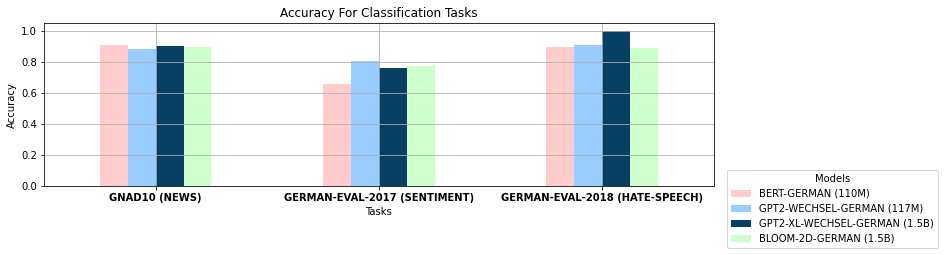

In [9]:
from matplotlib import cm
import matplotlib as mpl

nice_dataset_names = {
    'germeval18': 'GERMAN-EVAL-2018 (HATE-SPEECH)',
    'german-quad': 'GERMAN-QUAD',
    'germeval17': 'GERMAN-EVAL-2017 (SENTIMENT)',
    'german-ler': 'GERMAN-LEGAL-ENTITY-RECOGNITION',
    'gnad10': 'GNAD10 (NEWS)',
    'german-europarl': 'GERMAN-EUROPARL'
}

ds_name = list(set(df_cls.dataset_name))
print(ds_name)

#model_name = list(set(df_cls.model_name))
#model_name = ['BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (6.4B)']

model_name = ['BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)']
print(model_name)



cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    #curr_ds_list.append(str(each_ds))
    for each_model in model_name:
        #df_subset = df_cls[(df_cls.dataset_name == each_ds) & (df_cls.model_name == each_model)]
        df_subset = df_cls.loc[(df_cls['dataset_name'] == each_ds) & (df_cls['model_name'] == each_model)]
        #print(each_ds)
        #print(each_model)
        #print(df_subset)
        if(df_subset.empty == False):
            #print(df_subset)
            #print(each_ds)
            #print(each_model)
            curr_eval = df_subset['eval_accuracy'].values[0]
            #print(curr_eval)
            curr_ds_list.append(curr_eval)
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
#df_new = pd.DataFrame(all_evals, columns = ['Models', 'bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german'])
columns = ['Tasks'] +  model_name
print(columns)
df_new = pd.DataFrame(all_evals, columns = columns)
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='Accuracy For Classification Tasks',
    #xlabel = 'Datasets',
    ylabel = 'Accuracy',
    #colormap='Accent',
    color = ['#FFCCCC', '#99CCFF', '#084065', '#CCFFCC', '#08651A']
)


plt.rcParams["figure.figsize"] = (12,3)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360, weight = 'bold')
plt.grid()
#plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('classification_res_freeze.png', bbox_inches='tight')

plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('classification_res.png', bbox_inches='tight')


In [10]:
df_ner = df[df.problem_type == "token_classification"]
df_ner = df_ner.drop_duplicates(ignore_index = True)
df_ner


,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_exact_match,eval_f1,eval_precision,eval_recall
0,german-ler,0.018812,0.994961,35.6750,186.854,23.378,1.0,6666,BERT-GERMAN (110M),token_classification,NaN,16,NaN,NaN,0.931912,0.919498,0.944665
1,german-europarl,0.239240,0.921089,0.8055,212.282,27.311,1.0,171,BERT-GERMAN (110M),token_classification,NaN,16,NaN,NaN,0.810058,0.844066,0.778684
2,german-ler,0.049169,0.986509,71.7805,92.866,11.619,1.0,6666,BLOOM-2D-GERMAN (1.5B),token_classification,NaN,2,NaN,NaN,0.767822,0.725843,0.814954
3,german-europarl,0.092372,0.973929,1.1410,149.865,19.281,1.0,171,BLOOM-2D-GERMAN (1.5B),token_classification,NaN,2,NaN,NaN,0.933488,0.931054,0.935935
4,german-europarl,0.507109,0.837989,0.7800,219.233,28.205,1.0,171,GPT2-WECHSEL-GERMAN (117M),token_classification,NaN,16,NaN,NaN,0.593968,0.591566,0.596389
5,german-ler,0.055698,0.984492,36.5816,182.223,22.798,1.0,6666,GPT2-WECHSEL-GERMAN (117M),token_classification,NaN,16,NaN,NaN,0.717371,0.670925,0.770726
6,german-europarl,0.251741,0.913408,2.4372,70.162,9.027,1.0,171,GPT2-XL-WECHSEL-GERMAN (1.5B),token_classification,NaN,16,NaN,NaN,0.800117,0.801754,0.798486
7,german-ler,0.042336,0.988248,76.1266,87.565,10.955,1.0,6666,GPT2-XL-WECHSEL-GERMAN (1.5B),token_classification,NaN,2,NaN,NaN,0.785794,0.741294,0.835978


['german-europarl', 'german-ler']
['BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)']
german-europarl
BERT-GERMAN (110M)
german-europarl
GPT2-WECHSEL-GERMAN (117M)
german-europarl
GPT2-XL-WECHSEL-GERMAN (1.5B)
german-europarl
BLOOM-2D-GERMAN (1.5B)
german-ler
BERT-GERMAN (110M)
german-ler
GPT2-WECHSEL-GERMAN (117M)
german-ler
GPT2-XL-WECHSEL-GERMAN (1.5B)
german-ler
BLOOM-2D-GERMAN (1.5B)
[['GERMAN-EUROPARL', 0.8100575583156618, 0.5939675174013921, 0.8001167201634083, 0.933488237002614], ['GERMAN-LEGAL-ENTITY-RECOGNITION', 0.9319115632948544, 0.7173712386930036, 0.7857941834451903, 0.7678221059516024]]


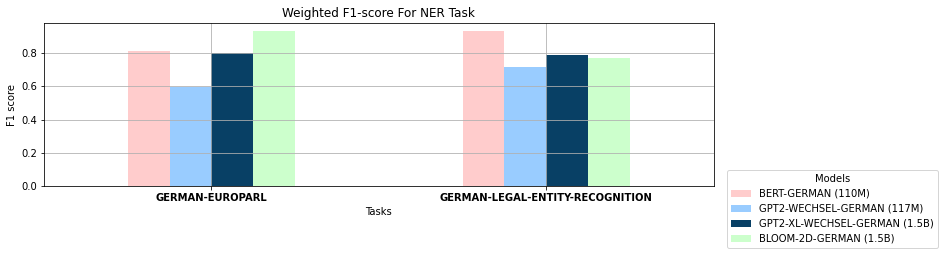

In [11]:
from matplotlib import cm

ds_name = list(set(df_ner.dataset_name))
print(ds_name)

#model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german']
#model_name = ['BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (6.4B)']

model_name = ['BERT-GERMAN (110M)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)', 'BLOOM-2D-GERMAN (1.5B)']


print(model_name)

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    #curr_ds_list.append(str(each_ds))
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    for each_model in model_name:
        df_subset = df_ner[(df_ner.dataset_name == each_ds) & (df_ner.model_name == each_model)]
        if(df_subset.empty == False):
            #print(df_subset)
            print(each_ds)
            print(each_model)
            curr_eval = df_subset['eval_f1'].values[0]
            #print(curr_eval)
            curr_ds_list.append(curr_eval)
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
columns = ['Tasks'] + model_name


df_new = pd.DataFrame(all_evals, columns = columns)
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='Weighted F1-score For NER Task',
    #xlabel = 'Datasets',
    ylabel = 'F1 score',
    #colormap='Accent',
    color = ['#FFCCCC', '#99CCFF', '#084065', '#CCFFCC', '#08651A']
)

plt.rcParams["figure.figsize"] = (10,3)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360, weight = 'bold')
plt.grid()

#plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('ner_res_freeze.png', bbox_inches='tight')

plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('ner_res.png', bbox_inches='tight')


In [12]:
df_qa = df[df.problem_type == "question_answering"]
df_qa = df_qa.drop_duplicates(ignore_index = True)
df_qa

,dataset_name,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,eval_samples,model_name,problem_type,problem_description,batch_size,label,eval_exact_match,eval_f1,eval_precision,eval_recall
0,german-quad,NaN,NaN,15.6752,242.612,30.366,1.0,3803,BERT-GERMAN (110M),question_answering,NaN,64,NaN,39.655172,59.36372,NaN,NaN


['german-quad']
['BERT-GERMAN (110M)', 'BLOOM-2D-GERMAN (1.5B)', 'GPT2-WECHSEL-GERMAN (117M)', 'GPT2-XL-WECHSEL-GERMAN (1.5B)']
[['GERMAN-QUAD', 59.36371998958213]]


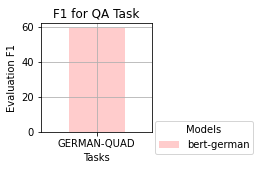

In [14]:
from matplotlib import cm

ds_name = list(set(df_qa.dataset_name))
print(ds_name)

model_name = list(set(df_cls.model_name))
#model_name = ['bert-german', 'gpt2-xl-german', 'gpt2-wechsel-german']
print(model_name)

all_evals = []
for each_ds in ds_name:
    curr_ds_list = list()
    #curr_ds_list.append(str(each_ds))
    curr_ds_list.append(nice_dataset_names[str(each_ds)])
    for each_model in model_name:
        df_subset = df_qa[(df_qa.dataset_name == each_ds) & (df_qa.model_name == each_model)]
        if(df_subset.empty == False):
            #print(df_subset)
            #print(each_ds)
            #print(each_model)
            curr_eval = df_subset['eval_f1'].values[0]
            curr_ds_list.append(curr_eval)
            #print(curr_eval)
        
        
    all_evals.append(curr_ds_list)


print(all_evals)
    
colors = plt.cm.get_cmap('inferno')
    
df_new = pd.DataFrame(all_evals, columns = ['Tasks', 'bert-german'])
df_new.plot(
    x='Tasks', 
    kind = 'bar', 
    stacked = False, 
    title='F1 for QA Task',
    #xlabel = 'Datasets',
    ylabel = 'Evaluation F1',
    #colormap='Accent',
    color=['#FFCCCC']
)

plt.rcParams["figure.figsize"] = (2,2)
#plt.xlabel('Datasets', rotation=0, fontsize=10, labelpad=20)
plt.xticks(rotation = 360)
plt.grid()
#plt.legend(title = 'Models (Frozen Embeddings)', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
#plt.savefig('qa_res_freeze.png', bbox_inches='tight')

plt.legend(title = 'Models', bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.savefig('qa_res.png', bbox_inches='tight')


In [6]:
class_widget = pn.widgets.Select(name = 'model_name', options = ['gpt2-wechsel', 'bert-german'])

idf_filtered = idf[(idf.problem_type == "classification") & (idf.model_name == class_widget)]
classification_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y ="eval_accuracy", colorbar = "True", 
                                          ylabel = "Evaluation Accuracy",
                                          xlabel = "Datasets",
                                          title = "Classification Task Performance",
                                          color=["#f16a6f"],
                                         )

pn.Row(classification_plot)

Row
    [0] Interactive(Interactive)

In [7]:
ner_widget = pn.widgets.Select(name = 'model_name', options = ['gpt2-wechsel', 'bert-german'])

idf_filtered = idf[(idf.problem_type == "token_classification") & (idf.model_name == ner_widget)]
ner_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y ="eval_accuracy", colorbar = "false",
                                ylabel = "Evaluation Accuracy",
                                xlabel = "Datasets",
                               title = "NER Task Performance",
                               color = ["#1e85f7"]
                              )

pn.Row(ner_plot)

Row
    [0] Interactive(Interactive)

In [8]:
qa_widget = pn.widgets.Select(name = 'model_name', options = ['bert-german'])

idf_filtered = idf[(idf.problem_type == "question_answering") & (idf.model_name == qa_widget)]
qa_plot = idf_filtered.hvplot(kind = "bar", x="dataset_name", y="eval_f1", colorbar = "false", 
                                ylabel = "Evaluation F1",
                                xlabel = "Datasets",
                                title = "QA Task Performance"
                             )

pn.Row(qa_plot)

Row
    [0] Interactive(Interactive)

In [9]:
idf_filtered = idf[["dataset_name", "model_name", "batch_size", "epoch", "eval_runtime"]]

raw_table = idf_filtered.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
raw_table

In [10]:
main_widget = pn.widgets.Select(name = 'model_name', options = ['bert-german', 'gpt2-wechsel'])


template = pn.template.FastListTemplate(
    title='Performance of German LLMs', 
    #sidebar=[pn.pane.Markdown("#"), 
    #         pn.pane.Markdown(""), 
    #         pn.pane.Markdown("#"),   
    #         ],
    
    
    main=[pn.Row(pn.Column(class_widget, 
                           classification_plot.panel(width=700), margin=(0,25)), 
                 raw_table.panel(width=500)), 
          pn.Row(pn.Column(ner_widget, ner_plot.panel(width=600), margin=(0,25)), 
                 pn.Column(qa_widget, qa_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
                 
template.show()
#template.servable()

Launching server at http://localhost:49403
